<a href="https://colab.research.google.com/github/ferngndo/remote-sensing/blob/main/Aritm%C3%A9tica_de_Bandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install rasterio -q

In [3]:
import rasterio as rio
import numpy as np
from rasterio.plot import show
from matplotlib import pyplot as plt
from rasterio.plot import reshape_as_raster, reshape_as_image

In [4]:
ras = '/content/L71221071_07120010720_DN.tif'

In [5]:
dataset = rio.open(ras)

In [6]:
dataset.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': None,
 'width': 1520,
 'height': 1233,
 'count': 6,
 'crs': CRS.from_epsg(32723),
 'transform': Affine(30.0, 0.0, 160664.99999999997,
        0.0, -30.0, 8279275.0)}

In [7]:
rast = dataset.read()

In [8]:
rast.shape

(6, 1233, 1520)

In [9]:
red = dataset.read(3)*0.0000275
nir = dataset.read(4)*0.0000275

In [10]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [11]:
ndvi = (nir - red) / (nir + red)

In [12]:
rast_rgb = dataset.read([3,2,1])

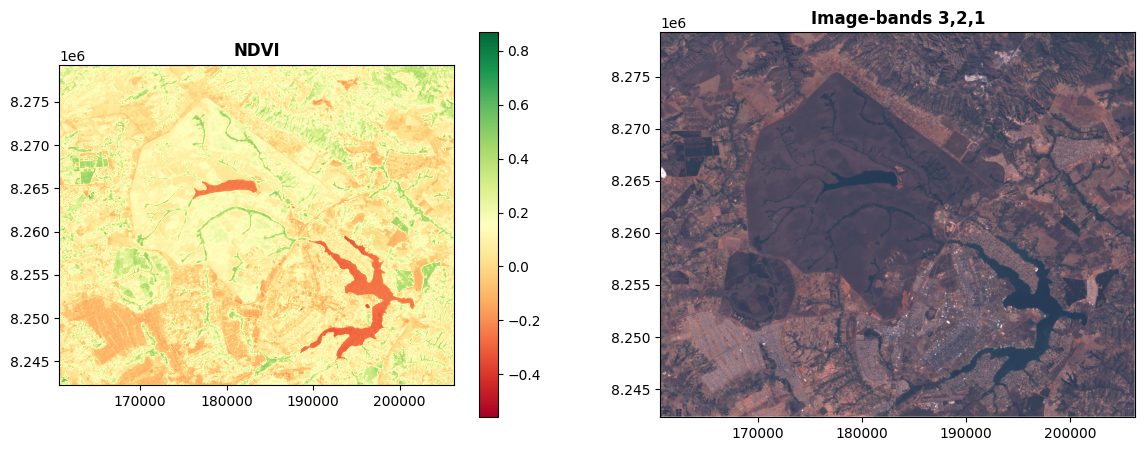

<Axes: title={'center': 'Image-bands 3,2,1'}>

In [19]:
fig, (axndvi, axrgb) = plt.subplots(1,2, figsize=(14,5))

image_barplot = plt.imshow(ndvi, cmap='RdYlGn')
fig.colorbar(image_barplot, ax=axndvi)

show(ndvi, ax=axndvi, transform=dataset.transform, cmap='RdYlGn', title='NDVI')

show(rast_rgb/150,transform=dataset.transform,title='Image-bands 3,2,1')

In [17]:
dataset.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': None,
 'width': 1520,
 'height': 1233,
 'count': 6,
 'crs': CRS.from_epsg(32723),
 'transform': Affine(30.0, 0.0, 160664.99999999997,
        0.0, -30.0, 8279275.0)}

In [18]:
kwargs = dataset.meta
kwargs.update(
    dtype=rio.float32,
    count=1,
    nodata=-9999.99,
    compress='lzw')


with rio.open('ndvi.tif', 'w', **kwargs) as dst:
     dst.write_band(1, ndvi.astype(rio.float32))